In [208]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [209]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [210]:
import matplotlib.pyplot as plt

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


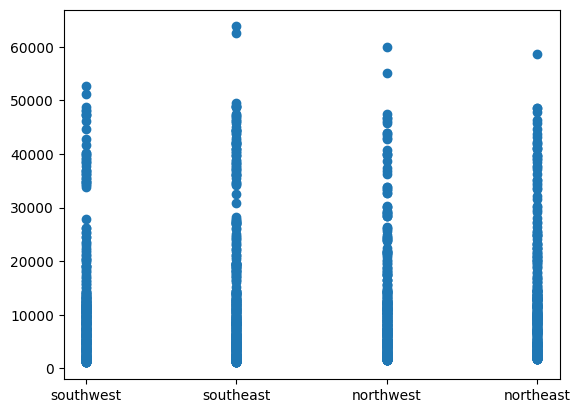

In [211]:
plt.scatter(df.region,df.charges)
# here we can see that the charges not much depneds on region
t_df = df
t_df = t_df.drop('region',axis='columns')
t_df.head()

In [212]:
# x=age,sex,bmi,children,smoker
# y=charge(prediction)

In [213]:
dummy_sex = pd.get_dummies(t_df['sex'],dtype=int)
dummy_smoker = pd.get_dummies(t_df['smoker'],dtype=int)
dummy = pd.concat([dummy_smoker,dummy_sex],axis='columns')
dummy.head()

,no,yes,female,male
0,0,1,1,0
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1


In [214]:
t_df = pd.concat([t_df,dummy],axis='columns')
t_df.head()

,age,sex,bmi,children,smoker,charges,no,yes,female,male
0,19,female,27.900,0,yes,16884.92400,0,1,1,0
1,18,male,33.770,1,no,1725.55230,1,0,0,1
2,28,male,33.000,3,no,4449.46200,1,0,0,1
3,33,male,22.705,0,no,21984.47061,1,0,0,1
4,32,male,28.880,0,no,3866.85520,1,0,0,1


In [226]:
# to avoid the dummy column trap
X = t_df.drop(['female','no','charges','sex','smoker'],axis='columns')
X
# age	bmi	children	yes	male

,age,bmi,children,yes,male
0,19,27.900,0,1,0
1,18,33.770,1,0,1
2,28,33.000,3,0,1
3,33,22.705,0,0,1
4,32,28.880,0,0,1
...,...,...,...,...,...
1333,50,30.970,3,0,1
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [216]:
Y = t_df.charges
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [217]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

In [218]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [219]:
print(len(X_train))
print(len(X_test))

1070
268


In [220]:
model.fit(X_train,Y_train)
# plt.scatter(X_train,Y_train)

LinearRegression()

In [227]:
# model.predict([[age,bmi,children,smoking,sex]])
model.predict([[18,33,1,0,1]])

C:\Users\oc110\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3425.44603032])

In [222]:
model.score(X_test,Y_test)
# hence the model is 80.40% accurate

0.8040098990124214

In [225]:
from joblib import dump, load 
dump(model,'insurance_charges_model')

['insurance_charges_model']